In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy

In [2]:
import numpy as np
import pandas as pd

In [3]:
lower_data = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_lower")
upper_data = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_upper")

In [4]:
age_groups = ['age_group_0_9', 'age_group_10_19', 'age_group_20_29','age_group_30_39', 'age_group_40_49', 'age_group_50_59', 'age_group_60_69', 'age_group_70_79', 'age_group_80_plus']
econ_activities = ['transport', 'leisure', 'other']
cont = [ 'S', 'E', 'I', 'R', 'N', 'Ia', 'Ips', \
           'Ims', 'Iss', 'Rq', 'H', 'ICU', 'D' ]

In [5]:
data = pd.read_csv("donnees-hospitalieres-classe-age-covid19-2020-06-18-19h00.csv", sep=";")
data.head()

,reg,cl_age90,jour,hosp,rea,rad,dc
0,1,0,2020-03-18,0,0,0,0
1,1,9,2020-03-18,0,0,0,0
2,1,19,2020-03-18,0,0,0,0
3,1,29,2020-03-18,0,0,0,0
4,1,39,2020-03-18,0,0,0,0


In [6]:
# Extract days 
days = data[data['reg']==11][data['cl_age90']==0].jour.values

/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [7]:
beds_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].hosp.values for i in range(0,9)
}
beds_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].hosp.values
beds_real['total']=data[data['reg']==11][data['cl_age90']==0].hosp.values

icus_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].rea.values for i in range(0,9)
}
icus_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].rea.values
icus_real['total']=data[data['reg']==11][data['cl_age90']==0].rea.values

deaths_real = {
    age_groups[i]:data[data['reg']==11][data['cl_age90']==10*i+9].dc.values for i in range(0,9)
}
deaths_real['age_group_80_plus']+=data[data['reg']==11][data['cl_age90']==90].dc.values
deaths_real['total']=data[data['reg']==11][data['cl_age90']==0].dc.values


/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/sergioacamelogomez/opt/anaconda3/lib/pyth

In [8]:
mult_deaths = np.sum(data[data['reg']==11][data['cl_age90']==0].hosp.values)/np.sum(data[data['reg']==11][data['cl_age90']==0].dc.values)
print(mult_deaths)
mult_icus = np.sum(data[data['reg']==11][data['cl_age90']==0].hosp.values)/np.sum(data[data['reg']==11][data['cl_age90']==0].rea.values)
print(mult_icus)


1.6686705156872337
6.371596044491136


/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/Users/sergioacamelogomez/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
import yaml
from inspect import getsourcefile
import os.path
import sys
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import argparse
current_path = os.path.abspath(getsourcefile(lambda:0))
current_dir = os.path.dirname(current_path)
parentdir = os.path.dirname(current_dir)
sys.path.insert(0,parentdir) 
sys.path.insert(0, parentdir+"/heuristics")
sys.path.insert(0, parentdir+"/heuristics/LP-Models")
sys.path.insert(0, parentdir+"/fast_gradient")


from fast_group import FastDynamicalModel
from aux import *


In [10]:
region = "Ile-de-France"

In [11]:
# Read group parameters
with open("../parameters/"+region+".yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    universe_params = yaml.load(file, Loader=yaml.FullLoader)
    
# Read initialization
with open("../initialization/patient_zero.yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    original_initialization = yaml.load(file, Loader=yaml.FullLoader)
    

In [12]:
date_1 = datetime.strptime("2020-03-17", '%Y-%m-%d')
date_2 = datetime.strptime("2020-05-11", '%Y-%m-%d')
date_3 = datetime.strptime("2020-06-02", '%Y-%m-%d')
date_4 = datetime.strptime("2020-06-15", '%Y-%m-%d')
date_5 = datetime.strptime("2020-06-22", '%Y-%m-%d')
#final_date = datetime.strptime(days[-1], '%Y-%m-%d') + timedelta(days=1)
final_date = datetime.strptime("2020-06-24", '%Y-%m-%d')

In [13]:
from copy import deepcopy

In [15]:
# Create model
mixing_method = {}
dynModel = FastDynamicalModel(universe_params, 1.0, mixing_method)


In [16]:
params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params", index_col = 0)
initial_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_lower", index_col = 0)
lower_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

params = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="SEIR_params_conf_range_upper", index_col = 0)
upper_params = {
    "mu":params['mu'].values,
    "sigma":params['sigma'].values,
    "p_ICU":params['p_ICU'].values,
    "p_H":params['p_H'].values,
    "lambda_H_R":params['lambda_HR'].values,
    "lambda_H_D":params['lambda_HD'].values,
    "lambda_ICU_R":params['lambda_ICUR'].values,
    "lambda_ICU_D":params['lambda_ICUD'].values
}

In [17]:
# Construct the windows for the parameters to move
windows = {}
for p in initial_params:
    windows[p] = (
        np.min(upper_params[p]/initial_params[p]),
        np.max(lower_params[p]/initial_params[p]),
    )
    
windows['beta_mixing'] = (0.1,3.0)
windows['alpha_mixing'] = (0.1,3.0)
windows['gamma_mixing'] = (0.7,1.3)

In [154]:
import copy
best_v = 0
best_error = float('inf')
def error(v):
    days_ahead = v[0]
    alpha_mixing = v[1]
    beta_mixing = v[2]
    gamma_mixing = v[3]
    
    dynModel.mu = np.array(v[4:13])
    dynModel.sigma = np.array(v[13:22])
    dynModel.p_H = np.array(v[22:31])
    dynModel.p_ICU = np.array(v[31:40])
    dynModel.lambda_H_R = np.array(v[40:49])
    dynModel.lambda_H_D = np.array(v[49:58])
    dynModel.lambda_ICU_R = np.array(v[58:67])
    dynModel.lambda_ICU_D = np.array(v[67:76])

    
    upper_bound = v[76]
    
    delta_transport = v[77]
    delta_school = v[78]

    leisure_1 = v[79]
    leisure_2 = v[80]
    leisure_3 = v[81]
    leisure_4 = v[82]
    leisure_5 = v[83]
    leisure_denom = leisure_1+leisure_2+leisure_3+leisure_4+leisure_5

    other_1 = v[84]
    other_2 = v[85]
    other_3 = v[86]
    other_4 = v[87]
    other_5 = v[88]
    other_denom = other_1+other_2+other_3+other_4+other_5
    
    work_1 = v[89]
    work_2 = v[90]
    work_3 = v[91]
    work_4 = v[92]
    work_5 = v[93]
    work_denom = work_1+work_2+work_3+work_4+work_5

    initial = v[94:103]
    
    # Construct initialization
    initialization = copy.deepcopy(original_initialization)
    for i,group in enumerate(age_groups):
        initialization[group]["I"] = initialization[group]["I"] + (v[30+i])
        initialization[group]["S"] = initialization[group]["S"] - (v[30+i])
        initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]

    
    # Alphas
    a_before_date_1 = {
        'home':upper_bound,
        'leisure':upper_bound,
        'other':upper_bound,
        'school':upper_bound,
        'transport':delta_transport*upper_bound,
        'work':upper_bound
    }
    a_between_date_1_2 = {
        'home':upper_bound,
        'leisure':leisure_1/leisure_denom*upper_bound,
        'other':other_1/other_denom*upper_bound,
        'school':0,
        'transport':delta_transport*0.24*work_1/work_denom*upper_bound*upper_bound,
        'work':work_1/work_denom*upper_bound
    }
    a_between_date_2_3 = {
        'home':upper_bound,
        'leisure':(leisure_1+leisure_2)/leisure_denom*upper_bound,
        'other':(other_1+other_2)/other_denom*upper_bound,
        'school':0.33*delta_school*upper_bound,
        'transport':delta_transport*(work_1+work_2)/work_denom*upper_bound,
        'work':(work_1+work_2)/work_denom*upper_bound
    }
    a_between_date_3_4 = {
        'home':upper_bound,
        'leisure':(leisure_1+leisure_2+leisure_3)/leisure_denom*upper_bound,
        'other':(other_1+other_2+other_3)/other_denom*upper_bound,
        'school':0.67*delta_school*upper_bound,
        'transport':delta_transport*(work_1+work_2+work_3)/work_denom*upper_bound,
        'work':(work_1+work_2+work_3)/work_denom*upper_bound
    }
    a_between_date_4_5 = {
        'home':upper_bound,
        'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
        'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
        'school':0.67*delta_school*upper_bound,
        'transport':delta_transport*(work_1+work_2+work_3+work_4)/work_denom*upper_bound,
        'work':(work_1+work_2+work_3+work_4)/work_denom*upper_bound
    }
    a_after_date_5 = {
        'home':upper_bound,
        'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
        'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
        'school':1.0*delta_school*upper_bound,
        'transport':delta_transport*(work_1+work_2+work_3+work_4)/work_denom*upper_bound,
        'work':(work_1+work_2+work_3+work_4)/work_denom*upper_bound
    }


    # Determine mixing method
    mixing_method = {
        "name":"mult",
        "param_alpha":alpha_mixing,
        "param_beta":beta_mixing,
        "param_gamma":gamma_mixing,
    }
    dynModel.mixing_method = mixing_method

    # Number of days
    days_before_date_1 = int(days_ahead)
    days_between_dates_1_2 = (date_2-date_1).days
    days_between_dates_2_3 = (date_3-date_2).days
    days_between_dates_3_4 = (date_4-date_3).days
    days_between_dates_4_5 = (date_5-date_4).days
    days_after_date_5 = (final_date-date_5).days
    total_days = days_before_date_1 + days_between_dates_1_2 + days_between_dates_2_3 + days_between_dates_3_4 + days_between_dates_4_5 + days_after_date_5



    # Calculate alphas
    alphas_vec = []
    for t in range(days_before_date_1):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_before_date_1
        alphas_vec.append(alphas)
    for t in range(days_between_dates_1_2):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_1_2
        alphas_vec.append(alphas)
    for t in range(days_between_dates_2_3):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_2_3
        alphas_vec.append(alphas)
    for t in range(days_between_dates_3_4):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_3_4
        alphas_vec.append(alphas)
    for t in range(days_between_dates_4_5):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_between_date_4_5
        alphas_vec.append(alphas)
    for t in range(days_after_date_5):
        alphas = {}
        for age_group in age_groups:
            alphas[age_group] = a_after_date_5
        alphas_vec.append(alphas)

    # Calculate tests
    tests = np.zeros(len(age_groups))
    
    
    # Run model
    model_data_beds = {ag:[] for ag in age_groups+["total"]}
    model_data_icus = {ag:[] for ag in age_groups+["total"]}
    model_data_deaths = {ag:[] for ag in age_groups+["total"]}

    state = state_to_matrix(initialization)
    t_beds = 0
    t_icus = 0
    t_deaths = 0
    for i,ag in enumerate(age_groups):
        state_H = state[i,cont.index("H")]
        state_ICU = state[i,cont.index("ICU")]
        state_D = state[i,cont.index("D")]
        model_data_beds[ag].append(state_H)
        model_data_icus[ag].append(state_ICU)
        model_data_deaths[ag].append(state_D)
        t_beds+= state_H
        t_icus+= state_ICU
        t_deaths+= state_D
    model_data_beds["total"].append(t_beds)
    model_data_icus["total"].append(t_icus)
    model_data_deaths["total"].append(t_deaths)
    
    for t in range(total_days):
        state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]))
        t_beds = 0
        t_icus = 0
        t_deaths = 0
        for i,ag in enumerate(age_groups):
            state_H = state[i,cont.index("H")]
            state_ICU = state[i,cont.index("ICU")]
            state_D = state[i,cont.index("D")]
            model_data_beds[ag].append(state_H)
            model_data_icus[ag].append(state_ICU)
            model_data_deaths[ag].append(state_D)
            t_beds+= state_H
            t_icus+= state_ICU
            t_deaths+= state_D
        model_data_beds["total"].append(t_beds)
        model_data_icus["total"].append(t_icus)
        model_data_deaths["total"].append(t_deaths)
            
    
    initial_date = date_1-timedelta(days=days_before_date_1)

    # Calculate the days of the model
    days_model = [initial_date+timedelta(days = t) for t in range(total_days + 1)]

    # Indices where to put the real data
    indices = [(datetime.strptime(d, '%Y-%m-%d') - initial_date).days for d in days]

    # Real data
    real_data_beds = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
    real_data_icus = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
    real_data_deaths = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
    
    for k,ind in enumerate(indices):
        for ag in age_groups+["total"]:
            real_data_beds[ag][ind] = beds_real[ag][k]
            real_data_icus[ag][ind] = icus_real[ag][k]
            real_data_deaths[ag][ind] = deaths_real[ag][k]

    error_beds = 0
    error_icus = 0
    error_deaths = 0
    for ag in age_groups:
        error_beds += np.nanmean(np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag])))
        error_icus += np.nanmean(np.abs(np.array(model_data_icus[ag])-np.array(real_data_icus[ag])))
        error_deaths += np.nanmean(np.abs(np.array(model_data_deaths[ag])-np.array(real_data_deaths[ag])))
    error_beds_total = np.nanmean(np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"])))
    error_icus_total = np.nanmean(np.abs(np.array(model_data_icus["total"])-np.array(real_data_icus["total"])))
    error_deaths_total = np.nanmean(np.abs(np.array(model_data_deaths["total"])-np.array(real_data_deaths["total"])))
    
    
    error = error_beds_total
    error = mult_icus*error_icus_total
    error = mult_deaths*error_deaths_total
    error = (error_beds_total*1.5 + mult_icus*error_icus_total*3 + 0.5*mult_deaths*error_deaths_total)/3
    
    global best_error
    global best_v
    if error<best_error:
        best_error = error
        print(best_error)
        best_v = v
        print(v)
    return error





In [155]:
from scipy.optimize import minimize, Bounds, shgo, differential_evolution
epsilon = 0.1
result = differential_evolution(error, [(30,120),
                                        windows['alpha_mixing'],windows['beta_mixing'],windows['gamma_mixing']]+
                                        list(zip(
                                            list(lower_params['mu'])+list(lower_params['sigma'])+list(lower_params['p_H'])+
                                            list(lower_params['p_ICU'])+list(lower_params['lambda_H_R'])+list(lower_params['lambda_H_D'])+
                                            list(lower_params['lambda_ICU_R'])+list(lower_params['lambda_ICU_D']),
                                            list(upper_params['mu'])+list(upper_params['sigma'])+list(upper_params['p_H'])+
                                            list(upper_params['p_ICU'])+list(upper_params['lambda_H_R'])+list(upper_params['lambda_H_D'])+
                                            list(upper_params['lambda_ICU_R'])+list(upper_params['lambda_ICU_D'])
                                        ))+[(0,1),(0.2,1),(0.5,1)]+
                                        [(0,1)]*15+[(0,2)]*9)




10974.088355594913
[1.12149605e+02 1.08897042e-01 1.03701187e+00 1.23175983e+00
 2.59264807e-01 2.52247991e-01 2.62032505e-01 2.68859197e-01
 2.38472898e-01 2.76424109e-01 2.65533543e-01 2.58965533e-01
 2.52659866e-01 2.77713794e-01 2.82459201e-01 2.71601312e-01
 2.77436510e-01 2.66172834e-01 2.54884040e-01 2.28287201e-01
 2.53125446e-01 2.32176515e-01 3.36625461e-04 2.69415539e-03
 7.60359997e-03 8.81613486e-03 1.50009360e-02 1.44863399e-02
 5.11017570e-02 8.85786824e-02 2.55727612e-01 2.68403304e-04
 2.29277259e-04 1.11025629e-03 1.28934534e-03 2.24820378e-03
 8.27050403e-03 1.61765183e-02 2.61332146e-02 1.05531389e-02
 6.64402538e-02 6.49293688e-02 6.80927396e-02 6.45689251e-02
 6.57789843e-02 6.12655606e-02 5.88223068e-02 5.29372078e-02
 4.62367829e-02 3.28208198e-04 2.38589341e-04 5.24119128e-04
 1.36155397e-03 2.06734501e-03 4.12736682e-03 9.07001112e-03
 1.42748440e-02 2.01948804e-02 4.63860512e-02 4.47384352e-02
 4.61882856e-02 4.39487534e-02 4.28647855e-02 4.19918697e-02
 3.97

KeyboardInterrupt: 

In [139]:
best_v = [9.32915475e+01, 2.47889905e+00, 1.72638776e+00, 1.21209098e+00,
 2.52038749e-01, 2.28742980e-01, 2.55762338e-01, 2.74196728e-01,
 2.66074068e-01, 2.34371556e-01, 2.67455066e-01, 2.32386885e-01,
 2.31643580e-01, 2.55157221e-01, 2.77382918e-01, 2.66546280e-01,
 2.75442885e-01, 2.25718193e-01, 2.48677183e-01, 2.41216111e-01,
 2.57847907e-01, 2.60384219e-01, 2.09547106e-03, 2.58157498e-03,
 5.36948734e-03, 1.83902399e-02, 1.69565089e-02, 4.01546057e-02,
 9.66701223e-02, 1.08263424e-01, 3.65181159e-01, 6.01016450e-04,
 5.61141288e-04, 6.92478133e-04, 1.37465108e-03, 5.00653728e-03,
 6.83032033e-03, 1.44777084e-02, 1.84760172e-02, 1.52006898e-02,
 6.61797870e-02, 6.66195762e-02, 6.45600532e-02, 6.53432296e-02,
 6.32488151e-02, 6.13231011e-02, 5.83942818e-02, 5.16860322e-02,
 4.50742829e-02, 7.46840505e-04, 5.99479708e-04, 6.95910412e-04,
 1.34896336e-03, 1.92633179e-03, 4.31326378e-03, 9.06102872e-03,
 1.33753198e-02, 2.08580591e-02, 4.62373701e-02, 4.53501941e-02,
 4.45142163e-02, 4.54335695e-02, 4.35536902e-02, 4.37188336e-02,
 4.08030138e-02, 3.71518267e-02, 3.11675091e-02, 2.07503132e-04,
 3.77879674e-04, 4.15372914e-04, 8.94836389e-04, 1.44506797e-03,
 2.95974994e-03, 5.48698618e-03, 9.98120325e-03, 1.44116964e-02,
 9.40273931e-01, 9.84830229e-01, 8.60325626e-02, 1.61996996e-01,
 6.48309630e-01, 9.71184657e-01, 2.54243030e-01, 9.34245225e-01,
 3.02863364e-01, 4.17699478e-01, 3.28649729e-01, 5.91692767e-01,
 4.22041720e-01, 7.73642912e-01, 2.31197432e-02, 5.70373872e-01,
 4.72060409e-01, 7.25673458e-01, 5.39721156e-01, 1.36001816e+00,
 1.01466719e+00, 1.55896692e-01, 1.47807266e+00, 9.12914439e-01,
 1.88124522e+00, 9.89433482e-01, 7.65216986e-01]

In [140]:
# v0 = (list(best_v[0:4]) + list(best_v[4]*initial_params["mu"]) + list(best_v[5]*initial_params['sigma']) + list(best_v[6]*initial_params['p_H'])+
#       list(best_v[7]*initial_params['p_ICU'])+list(best_v[8]*initial_params['lambda_H_R'])+list(best_v[9]*initial_params['lambda_H_D'])+
#     list(best_v[10]*initial_params['lambda_ICU_R'])+list(best_v[11]*initial_params['lambda_ICU_D']) + list(best_v[12:]))
v0 = best_v
error(v0)

3115.370652681528
[93.2915475, 2.47889905, 1.72638776, 1.21209098, 0.252038749, 0.22874298, 0.255762338, 0.274196728, 0.266074068, 0.234371556, 0.267455066, 0.232386885, 0.23164358, 0.255157221, 0.277382918, 0.26654628, 0.275442885, 0.225718193, 0.248677183, 0.241216111, 0.257847907, 0.260384219, 0.00209547106, 0.00258157498, 0.00536948734, 0.0183902399, 0.0169565089, 0.0401546057, 0.0966701223, 0.108263424, 0.365181159, 0.00060101645, 0.000561141288, 0.000692478133, 0.00137465108, 0.00500653728, 0.00683032033, 0.0144777084, 0.0184760172, 0.0152006898, 0.066179787, 0.0666195762, 0.0645600532, 0.0653432296, 0.0632488151, 0.0613231011, 0.0583942818, 0.0516860322, 0.0450742829, 0.000746840505, 0.000599479708, 0.000695910412, 0.00134896336, 0.00192633179, 0.00431326378, 0.00906102872, 0.0133753198, 0.0208580591, 0.0462373701, 0.0453501941, 0.0445142163, 0.0454335695, 0.0435536902, 0.0437188336, 0.0408030138, 0.0371518267, 0.0311675091, 0.000207503132, 0.000377879674, 0.000415372914, 0.0008

3115.370652681528

In [141]:
lb= ([30,windows['alpha_mixing'][0],windows['beta_mixing'][0],windows['gamma_mixing'][0]]+
                list(lower_params['mu'])+list(lower_params['sigma'])+list(lower_params['p_H'])+list(lower_params['p_ICU'])+
                list(lower_params['lambda_H_R'])+list(lower_params['lambda_H_D'])+list(lower_params['lambda_ICU_R'])+list(lower_params['lambda_ICU_D'])+
                [0]*18+[0]*9)
ub = ([120,windows['alpha_mixing'][1],windows['beta_mixing'][1],windows['gamma_mixing'][1]]+
                list(upper_params['mu'])+list(upper_params['sigma'])+list(upper_params['p_H'])+list(upper_params['p_ICU'])+
                list(upper_params['lambda_H_R'])+list(upper_params['lambda_H_D'])+list(upper_params['lambda_ICU_R'])+list(upper_params['lambda_ICU_D'])+
                [1]*18+[5]*9)
for i in range(len(v0)):
    assert(v0[i]>=lb[i])
    assert(ub[i]>=v0[i])

In [142]:
from scipy.optimize import minimize, Bounds, shgo, differential_evolution

bounds = Bounds(lb,ub)

result = minimize(error, v0, bounds = bounds)

3115.3706432820177
[9.32915475e+01 2.47889905e+00 1.72638776e+00 1.21209099e+00
 2.52038749e-01 2.28742980e-01 2.55762338e-01 2.74196728e-01
 2.66074068e-01 2.34371556e-01 2.67455066e-01 2.32386885e-01
 2.31643580e-01 2.55157221e-01 2.77382918e-01 2.66546280e-01
 2.75442885e-01 2.25718193e-01 2.48677183e-01 2.41216111e-01
 2.57847907e-01 2.60384219e-01 2.09547106e-03 2.58157498e-03
 5.36948734e-03 1.83902399e-02 1.69565089e-02 4.01546057e-02
 9.66701223e-02 1.08263424e-01 3.65181159e-01 6.01016450e-04
 5.61141288e-04 6.92478133e-04 1.37465108e-03 5.00653728e-03
 6.83032033e-03 1.44777084e-02 1.84760172e-02 1.52006898e-02
 6.61797870e-02 6.66195762e-02 6.45600532e-02 6.53432296e-02
 6.32488151e-02 6.13231011e-02 5.83942818e-02 5.16860322e-02
 4.50742829e-02 7.46840505e-04 5.99479708e-04 6.95910412e-04
 1.34896336e-03 1.92633179e-03 4.31326378e-03 9.06102872e-03
 1.33753198e-02 2.08580591e-02 4.62373701e-02 4.53501941e-02
 4.45142163e-02 4.54335695e-02 4.35536902e-02 4.37188336e-02
 4.08

3115.367408269291
[9.32915475e+01 2.47889249e+00 1.72638328e+00 1.21209122e+00
 2.52038676e-01 2.28742972e-01 2.55762255e-01 2.74196594e-01
 2.66073957e-01 2.34371532e-01 2.67454951e-01 2.32386867e-01
 2.31643564e-01 2.55157301e-01 2.77382936e-01 2.66546328e-01
 2.75442741e-01 2.25718186e-01 2.48677113e-01 2.41216061e-01
 2.57847812e-01 2.60384117e-01 2.09548302e-03 2.58157560e-03
 5.36949899e-03 1.83902411e-02 1.69565308e-02 4.01546285e-02
 9.66701245e-02 1.08263563e-01 3.65180596e-01 6.01015323e-04
 5.61140271e-04 6.92477338e-04 1.37465051e-03 5.00652927e-03
 6.83031684e-03 1.44777030e-02 1.84760108e-02 1.52006757e-02
 6.61797822e-02 6.66195702e-02 6.45600523e-02 6.53432253e-02
 6.32488140e-02 6.13230994e-02 5.83942770e-02 5.16860304e-02
 4.50742803e-02 7.46838986e-04 5.99478595e-04 6.95909753e-04
 1.34896234e-03 1.92633170e-03 4.31326269e-03 9.06102534e-03
 1.33753195e-02 2.08580572e-02 4.62373712e-02 4.53501976e-02
 4.45142216e-02 4.54335713e-02 4.35536953e-02 4.37188343e-02
 4.080

3115.101084614083
[9.32915475e+01 2.47792371e+00 1.72572095e+00 1.21212702e+00
 2.52027964e-01 2.28741746e-01 2.55750026e-01 2.74176858e-01
 2.66057529e-01 2.34368014e-01 2.67437960e-01 2.32384157e-01
 2.31641157e-01 2.55169084e-01 2.77385668e-01 2.66553473e-01
 2.75421472e-01 2.25717166e-01 2.48666743e-01 2.41208730e-01
 2.57833707e-01 2.60368979e-01 2.09577319e-03 2.58166781e-03
 5.37122019e-03 1.83904210e-02 1.69597657e-02 4.01580006e-02
 9.66704560e-02 1.08284165e-01 3.65097386e-01 6.00848755e-04
 5.60989942e-04 6.92359858e-04 1.37456635e-03 5.00534561e-03
 6.82980155e-03 1.44769041e-02 1.84750623e-02 1.51985862e-02
 6.61790678e-02 6.66186767e-02 6.45599178e-02 6.53425857e-02
 6.32486553e-02 6.13228477e-02 5.83935699e-02 5.16857691e-02
 4.50738938e-02 7.46614590e-04 5.99314210e-04 6.95812427e-04
 1.34881172e-03 1.92631810e-03 4.31310109e-03 9.06052519e-03
 1.33752687e-02 2.08577769e-02 4.62375320e-02 4.53507198e-02
 4.45150080e-02 4.54338309e-02 4.35544539e-02 4.37189351e-02
 4.080

3109.574707944616
[9.32915475e+01 2.47712907e+00 1.72517772e+00 1.21215408e+00
 2.52020994e-01 2.28740075e-01 2.55739944e-01 2.74160580e-01
 2.66045219e-01 2.34363880e-01 2.67422587e-01 2.32380703e-01
 2.31637202e-01 2.55178936e-01 2.77387809e-01 2.66558242e-01
 2.75402218e-01 2.25714210e-01 2.48655493e-01 2.41200081e-01
 2.57820612e-01 2.60354727e-01 2.10898469e-03 2.58679115e-03
 5.37492427e-03 1.83967924e-02 1.69715652e-02 4.01651580e-02
 9.66726448e-02 1.08302339e-01 3.65027222e-01 5.76113773e-04
 5.09615464e-04 6.38296771e-04 1.32209389e-03 4.96691189e-03
 6.80238405e-03 1.44550595e-02 1.84626077e-02 1.51899436e-02
 6.61773893e-02 6.66165632e-02 6.45573490e-02 6.53326967e-02
 6.32394456e-02 6.13082971e-02 5.83752113e-02 5.16729063e-02
 4.50584782e-02 7.44330084e-04 5.96203685e-04 6.90382714e-04
 1.32875906e-03 1.90817147e-03 4.28298665e-03 9.02081143e-03
 1.33476926e-02 2.08183315e-02 4.62403482e-02 4.53537559e-02
 4.45183250e-02 4.54399795e-02 4.35786906e-02 4.37390035e-02
 4.083

3098.611431013643
[9.32915475e+01 2.46875937e+00 1.71945584e+00 1.21245173e+00
 2.51937161e-01 2.28725287e-01 2.55633716e-01 2.73989448e-01
 2.65908739e-01 2.34327068e-01 2.67268431e-01 2.32350888e-01
 2.31606339e-01 2.55281526e-01 2.77410609e-01 2.66614198e-01
 2.75209044e-01 2.25694131e-01 2.48551692e-01 2.41123185e-01
 2.57690883e-01 2.60214588e-01 2.17648245e-03 2.61259969e-03
 5.40094251e-03 1.84289058e-02 1.70445144e-02 4.02146933e-02
 9.66831095e-02 1.08484875e-01 3.64297102e-01 4.94475397e-04
 3.00532206e-04 4.07035914e-04 1.16800000e-03 4.81328546e-03
 6.69232117e-03 1.43588251e-02 1.84052181e-02 1.51411254e-02
 6.61657150e-02 6.66019006e-02 6.45438280e-02 6.52801759e-02
 6.31925542e-02 6.12347251e-02 5.82819873e-02 5.16094827e-02
 4.49856810e-02 7.30761102e-04 5.78147858e-04 6.59630633e-04
 1.21639024e-03 1.89295039e-03 4.11522616e-03 8.79880248e-03
 1.32506527e-02 2.06000660e-02 4.62545613e-02 4.53704455e-02
 4.45376166e-02 4.54703719e-02 4.36986049e-02 4.38355600e-02
 4.096

KeyboardInterrupt: 

In [143]:
v = best_v

days_ahead = v[0]
alpha_mixing = v[1]
beta_mixing = v[2]
gamma_mixing = v[3]

dynModel.mu = np.array(v[4:13])
dynModel.sigma = np.array(v[13:22])
dynModel.p_H = np.array(v[22:31])
dynModel.p_ICU = np.array(v[31:40])
dynModel.lambda_H_R = np.array(v[40:49])
dynModel.lambda_H_D = np.array(v[49:58])
dynModel.lambda_ICU_R = np.array(v[58:67])
dynModel.lambda_ICU_D = np.array(v[67:76])


upper_bound = v[76]

delta_transport = v[77]
delta_school = v[78]

leisure_1 = v[79]
leisure_2 = v[80]
leisure_3 = v[81]
leisure_4 = v[82]
leisure_5 = v[83]
leisure_denom = leisure_1+leisure_2+leisure_3+leisure_4+leisure_5

other_1 = v[84]
other_2 = v[85]
other_3 = v[86]
other_4 = v[87]
other_5 = v[88]
other_denom = other_1+other_2+other_3+other_4+other_5

work_1 = v[89]
work_2 = v[90]
work_3 = v[91]
work_4 = v[92]
work_5 = v[93]
work_denom = work_1+work_2+work_3+work_4+work_5

initial = v[94:103]

# Construct initialization
initialization = copy.deepcopy(original_initialization)
for i,group in enumerate(age_groups):
    initialization[group]["I"] = initialization[group]["I"] + (v[30+i])
    initialization[group]["S"] = initialization[group]["S"] - (v[30+i])
    initialization[group]["N"] = initialization[group]["S"] + initialization[group]["E"] + initialization[group]["I"] + initialization[group]["R"]


# Alphas
a_before_date_1 = {
    'home':upper_bound,
    'leisure':upper_bound,
    'other':upper_bound,
    'school':upper_bound,
    'transport':delta_transport*upper_bound,
    'work':upper_bound
}
a_between_date_1_2 = {
    'home':upper_bound,
    'leisure':leisure_1/leisure_denom*upper_bound,
    'other':other_1/other_denom*upper_bound,
    'school':0,
    'transport':delta_transport*0.24*work_1/work_denom*upper_bound*upper_bound,
    'work':work_1/work_denom*upper_bound
}
a_between_date_2_3 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2)/leisure_denom*upper_bound,
    'other':(other_1+other_2)/other_denom*upper_bound,
    'school':0.33*delta_school*upper_bound,
    'transport':delta_transport*(work_1+work_2)/work_denom*upper_bound,
    'work':(work_1+work_2)/work_denom*upper_bound
}
a_between_date_3_4 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3)/other_denom*upper_bound,
    'school':0.67*delta_school*upper_bound,
    'transport':delta_transport*(work_1+work_2+work_3)/work_denom*upper_bound,
    'work':(work_1+work_2+work_3)/work_denom*upper_bound
}
a_between_date_4_5 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
    'school':0.67*delta_school*upper_bound,
    'transport':delta_transport*(work_1+work_2+work_3+work_4)/work_denom*upper_bound,
    'work':(work_1+work_2+work_3+work_4)/work_denom*upper_bound
}
a_after_date_5 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
    'school':1.0*delta_school*upper_bound,
    'transport':delta_transport*(work_1+work_2+work_3+work_4)/work_denom*upper_bound,
    'work':(work_1+work_2+work_3+work_4)/work_denom*upper_bound
}


# Determine mixing method
mixing_method = {
    "name":"mult",
    "param_alpha":alpha_mixing,
    "param_beta":beta_mixing,
    "param_gamma":gamma_mixing,
}
dynModel.mixing_method = mixing_method

# Number of days
days_before_date_1 = int(days_ahead)
days_between_dates_1_2 = (date_2-date_1).days
days_between_dates_2_3 = (date_3-date_2).days
days_between_dates_3_4 = (date_4-date_3).days
days_between_dates_4_5 = (date_5-date_4).days
days_after_date_5 = (final_date-date_5).days
total_days = days_before_date_1 + days_between_dates_1_2 + days_between_dates_2_3 + days_between_dates_3_4 + days_between_dates_4_5 + days_after_date_5



# Calculate alphas
alphas_vec = []
for t in range(days_before_date_1):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_before_date_1
    alphas_vec.append(alphas)
for t in range(days_between_dates_1_2):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_1_2
    alphas_vec.append(alphas)
for t in range(days_between_dates_2_3):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_2_3
    alphas_vec.append(alphas)
for t in range(days_between_dates_3_4):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_3_4
    alphas_vec.append(alphas)
for t in range(days_between_dates_4_5):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_between_date_4_5
    alphas_vec.append(alphas)
for t in range(days_after_date_5):
    alphas = {}
    for age_group in age_groups:
        alphas[age_group] = a_after_date_5
    alphas_vec.append(alphas)

# Calculate tests
tests = np.zeros(len(age_groups))


# Run model
model_data_beds = {ag:[] for ag in age_groups+["total"]}
model_data_icus = {ag:[] for ag in age_groups+["total"]}
model_data_deaths = {ag:[] for ag in age_groups+["total"]}

state = state_to_matrix(initialization)
t_beds = 0
t_icus = 0
t_deaths = 0
for i,ag in enumerate(age_groups):
    state_H = state[i,cont.index("H")]
    state_ICU = state[i,cont.index("ICU")]
    state_D = state[i,cont.index("D")]
    model_data_beds[ag].append(state_H)
    model_data_icus[ag].append(state_ICU)
    model_data_deaths[ag].append(state_D)
    t_beds+= state_H
    t_icus+= state_ICU
    t_deaths+= state_D
model_data_beds["total"].append(t_beds)
model_data_icus["total"].append(t_icus)
model_data_deaths["total"].append(t_deaths)

for t in range(total_days):
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]))
    t_beds = 0
    t_icus = 0
    t_deaths = 0
    for i,ag in enumerate(age_groups):
        state_H = state[i,cont.index("H")]
        state_ICU = state[i,cont.index("ICU")]
        state_D = state[i,cont.index("D")]
        model_data_beds[ag].append(state_H)
        model_data_icus[ag].append(state_ICU)
        model_data_deaths[ag].append(state_D)
        t_beds+= state_H
        t_icus+= state_ICU
        t_deaths+= state_D
    model_data_beds["total"].append(t_beds)
    model_data_icus["total"].append(t_icus)
    model_data_deaths["total"].append(t_deaths)


initial_date = date_1-timedelta(days=days_before_date_1)

# Calculate the days of the model
days_model = [initial_date+timedelta(days = t) for t in range(total_days + 1)]

# Indices where to put the real data
indices = [(datetime.strptime(d, '%Y-%m-%d') - initial_date).days for d in days]

# Real data
real_data_beds = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
real_data_icus = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}
real_data_deaths = {ag:[float('nan')]*len(days_model) for ag in age_groups+["total"]}

for k,ind in enumerate(indices):
    for ag in age_groups+["total"]:
        real_data_beds[ag][ind] = beds_real[ag][k]
        real_data_icus[ag][ind] = icus_real[ag][k]
        real_data_deaths[ag][ind] = deaths_real[ag][k]

error_beds = 0
error_icus = 0
error_deaths = 0
for ag in age_groups:
    error_beds += np.nanmean(np.abs(np.array(model_data_beds[ag])-np.array(real_data_beds[ag])))
    error_icus += np.nanmean(np.abs(np.array(model_data_icus[ag])-np.array(real_data_icus[ag])))
    error_deaths += np.nanmean(np.abs(np.array(model_data_deaths[ag])-np.array(real_data_deaths[ag])))
error_beds_total = np.nanmean(np.abs(np.array(model_data_beds["total"])-np.array(real_data_beds["total"])))
error_icus_total = np.nanmean(np.abs(np.array(model_data_icus["total"])-np.array(real_data_icus["total"])))
error_deaths_total = np.nanmean(np.abs(np.array(model_data_deaths["total"])-np.array(real_data_deaths["total"])))


error = error_beds_total
error = mult_icus*error_icus_total
error = mult_deaths*error_deaths_total
error = (1.5*error_beds_total + mult_icus*error_icus_total*3 + 0.5*mult_deaths*error_deaths_total)/3

print(error)

3086.109247965271


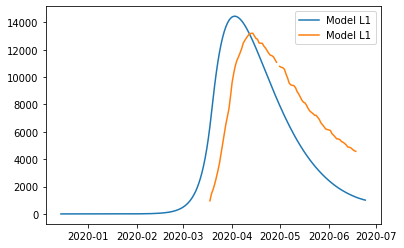

In [144]:
%matplotlib inline
plt.figure(1)
plt.plot(days_model, model_data_beds["total"], label="Model L1")
plt.plot(days_model, real_data_beds["total"], label="Model L1")
plt.legend(loc='upper right')

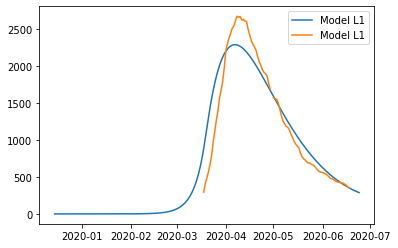

In [145]:
%matplotlib inline
plt.figure(1)
plt.plot(days_model, model_data_icus["total"], label="Model L1")
plt.plot(days_model, real_data_icus["total"], label="Model L1")
plt.legend(loc='upper right')

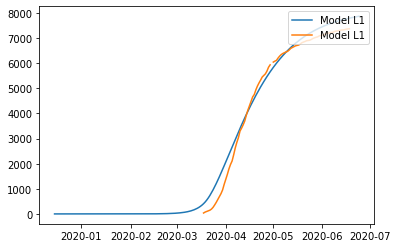

In [146]:
%matplotlib inline
plt.figure(1)
plt.plot(days_model, model_data_deaths["total"], label="Model L1")
plt.plot(days_model, real_data_deaths["total"], label="Model L1")
plt.legend(loc='upper right')

In [147]:
with open("../initialization/initialization.yaml") as file:
    initialization = yaml.load(file, Loader=yaml.FullLoader)
with open("../parameters/Ile-de-France.yaml") as file:
    # The FullLoader parameter handles the conversion from YAML
    # scalar values to Python the dictionary format
    universe_params = yaml.load(file, Loader=yaml.FullLoader)


In [ ]:
alpha_mixing = v[1]
beta_mixing = v[2]
gamma_mixing = v[3]

dynModel.mu = np.array(v[4:13])
dynModel.sigma = np.array(v[13:22])
dynModel.p_H = np.array(v[22:31])
dynModel.p_ICU = np.array(v[31:40])
dynModel.lambda_H_R = np.array(v[40:49])
dynModel.lambda_H_D = np.array(v[49:58])
dynModel.lambda_ICU_R = np.array(v[58:67])
dynModel.lambda_ICU_D = np.array(v[67:76])


upper_bound = v[76]

delta_transport = v[77]
delta_school = v[78]

leisure_1 = v[79]
leisure_2 = v[80]
leisure_3 = v[81]
leisure_4 = v[82]
leisure_5 = v[83]
leisure_denom = leisure_1+leisure_2+leisure_3+leisure_4+leisure_5

other_1 = v[84]
other_2 = v[85]
other_3 = v[86]
other_4 = v[87]
other_5 = v[88]
other_denom = other_1+other_2+other_3+other_4+other_5

work_1 = v[89]
work_2 = v[90]
work_3 = v[91]
work_4 = v[92]
work_5 = v[93]
work_denom = work_1+work_2+work_3+work_4+work_5

In [105]:
# Modify parameters
universe_params['mixing'] = {
    "name":"mult",
    "param_alpha":alpha_mixing,
    "param_beta":beta_mixing,
}
for i,age_group in enumerate(age_groups):
    universe_params['seir-groups'][age_group]['parameters']['beta'] = universe_params['seir-groups'][age_group]['parameters']['beta']*gamma_mixing
    universe_params['seir-groups'][age_group]['parameters']['mu'] = v[4+i]
    universe_params['seir-groups'][age_group]['parameters']['sigma'] = v[13+i]
    universe_params['seir-groups'][age_group]['parameters']['p_H'] = v[22+i]
    universe_params['seir-groups'][age_group]['parameters']['p_ICU'] = v[31+i]
    universe_params['seir-groups'][age_group]['parameters']['lambda_H_R'] = v[40+i]
    universe_params['seir-groups'][age_group]['parameters']['lambda_H_D'] = v[49+i]
    universe_params['seir-groups'][age_group]['parameters']['lambda_ICU_R'] = v[58+i]
    universe_params['seir-groups'][age_group]['parameters']['lambda_ICU_D'] = v[67+i]
    
with open('../parameters/fitted.yaml', 'w') as file:
    yaml.dump(universe_params, file)
    

In [148]:
# Add economic value parameters
contrib = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="contributions_normal", index_col = 0)
drops = pd.read_excel("./ile-de-france_data_master.xlsx",sheet_name="activity_levels_as_%_of_full", index_col = 0)

empl_params = {}
empl_params["v"] = {}
for age_group in age_groups:
    empl_params["v"][age_group] = {}
    for activity in econ_activities:
        empl_params["v"][age_group][activity] = float(contrib[age_group][activity])/365.0


In [149]:
# Calculate l-april and l-may
l_april = a_between_date_1_2
l_may = {}
for a in a_between_date_1_2.keys():
    l_may[a] = a_between_date_1_2[a]/3.0 + a_between_date_2_3[a]*2.0/3.0

In [150]:
l_april

{'home': 0.9405459698161046,
 'leisure': 0.051076140931646904,
 'other': 0.13928371181379529,
 'school': 0,
 'transport': 0.06343129621604267,
 'work': 0.2853068424388987}

In [151]:
l_may

{'home': 0.9405459698161045,
 'leisure': 0.18734680031493867,
 'other': 0.2647379546889569,
 'school': 0.017801749793314104,
 'transport': 0.2140327971126758,
 'work': 0.29094498741715824}

In [152]:
from gurobipy import *
# Solve equations
empl_params["nu"] = {}
empl_params["eta"] = {}
empl_params["gamma"] = {}
for activity in econ_activities:
    m = Model()
    nu = m.addVar(vtype=GRB.CONTINUOUS, name="nu", lb = 0)
    eta = m.addVar(vtype=GRB.CONTINUOUS, name="eta", lb = 0)
    gamma = m.addVar(vtype=GRB.CONTINUOUS, name="gamma", lb = 0)
    epsilonp_1 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonp_1", lb = 0)
    epsilonn_1 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonn_1", lb = 0)
    epsilonp_2 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonp_2", lb = 0)
    epsilonn_2 = m.addVar(vtype=GRB.CONTINUOUS, name="epsilonn_2", lb = 0)
    
    m.addConstr(nu+eta+gamma==1)
    m.addConstr(
        nu*l_april["work"] + eta*l_april[activity] + gamma == drops[activity]["April"]+epsilonp_1-epsilonn_1
    )
    m.addConstr(
        nu*l_may["work"] + eta*l_may[activity] + gamma == drops[activity]["May"]+epsilonp_2-epsilonn_2
    )
    m.setObjective(epsilonp_1+epsilonn_1+epsilonp_2+epsilonn_2)
    m.update()
    m.optimize()
    empl_params["nu"][activity] = float(nu.x)
    empl_params["eta"][activity] = float(eta.x)
    empl_params["gamma"][activity] = float(gamma.x)
    


Using license file /Users/sergioacamelogomez/gurobi.lic
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 3 rows, 7 columns and 13 nonzeros
Model fingerprint: 0xfe8898dd
Coefficient statistics:
  Matrix range     [6e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 1e+00]
Presolve time: 0.01s
Presolved: 3 rows, 7 columns, 13 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   8.437482e-01   0.000000e+00      0s
       3    1.3728748e-01   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.01 seconds
Optimal objective  1.372874781e-01
Gurobi Optimizer version 9.0.2 build v9.0.2rc0 (mac64)
Optimize a model with 3 rows, 7 columns and 13 nonzeros
Model fingerprint: 0x77199782
Coefficient statistics:
  Matrix range     [5e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+0

In [153]:
from gurobipy import *
# Solve equations
empl_params["nu"] = {}
empl_params["eta"] = {}
empl_params["gamma"] = {}
for activity in econ_activities:
    A = np.array([
        [1,1,1],
        [l_april["work"],l_april[activity],1],
        [l_may["work"],l_may[activity],1]
    ])
    b = np.array([1,drops[activity]["April"],drops[activity]["May"]])
    print("Activity:",activity)
    print("A=",A)
    print("b=",b)
    print("nu,eta,gamma=",np.linalg.solve(A,b))
    print("")


Activity: transport
A= [[1.         1.         1.        ]
 [0.28530684 0.0634313  1.        ]
 [0.29094499 0.2140328  1.        ]]
b= [1.   0.61 0.81]
nu,eta,gamma= [-1.25622808  1.37503806  0.88119002]

Activity: leisure
A= [[1.         1.         1.        ]
 [0.28530684 0.05107614 1.        ]
 [0.29094499 0.1873468  1.        ]]
b= [1.    0.313 0.426]
nu,eta,gamma= [-0.14787294  0.83535025  0.3125227 ]

Activity: other
A= [[1.         1.         1.        ]
 [0.28530684 0.13928371 1.        ]
 [0.29094499 0.26473795 1.        ]]
b= [1.    0.625 0.753]
nu,eta,gamma= [-0.7443403   1.05374434  0.69059596]



In [112]:
# Calculate the schooling parameter
r = 0.03
schooling_param = {}
for age_group in age_groups:
    if age_group == "age_group_0_9":
        schooling_param[age_group] = (1+r)**(-15)*sum([empl_params["v"]["age_group_20_29"][act] for act in econ_activities])
    elif age_group == "age_group_10_19":
        schooling_param[age_group] = 0.907*(1+r)**(-5)*sum([empl_params["v"]["age_group_20_29"][act] for act in econ_activities])
    else:
        schooling_param[age_group] = 0

In [113]:
# Calculate the cost of death
econ_cost_death = {}
age_groups_n = [0,10,20,30,40,50,60,70,80]
for i,age_group in enumerate(age_groups):
    s = 0
    for tao in range(age_groups_n[i]+5,70):
        ag = "age_group_%d_%d"%(int(tao/10)*10,int(tao/10)*10+9)
        s+=(1+r)**(-(tao-age_groups_n[i]))*sum([empl_params["v"][ag][act] for act in econ_activities])*365
    econ_cost_death[age_group] = float(s)

In [114]:
econ_params = {
    "employment_params":empl_params,
    "schooling_params":schooling_param,
    "econ_cost_death":econ_cost_death,
}
with open('../parameters/econ.yaml', 'w') as file:
    yaml.dump(econ_params, file)

In [115]:
print(econ_params)

{'employment_params': {'v': {'age_group_0_9': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0}, 'age_group_10_19': {'transport': 0.42995936063784673, 'leisure': 0.7068903576182438, 'other': 4.574913439411911}, 'age_group_20_29': {'transport': 2.421870523023006, 'leisure': 3.981764503475539, 'other': 25.769523863503046}, 'age_group_30_39': {'transport': 5.3207402525299345, 'leisure': 8.74775693759741, 'other': 56.61448108213707}, 'age_group_40_49': {'transport': 6.5473065780407085, 'leisure': 10.764338009809762, 'other': 69.6655628368981}, 'age_group_50_59': {'transport': 6.717886370840974, 'leisure': 11.04478593529775, 'other': 71.48058969296267}, 'age_group_60_69': {'transport': 2.606993951947998, 'leisure': 4.286123424007397, 'other': 27.739299941136395}, 'age_group_70_79': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0}, 'age_group_80_plus': {'transport': 0.0, 'leisure': 0.0, 'other': 0.0}}, 'nu': {}, 'eta': {}, 'gamma': {}}, 'schooling_params': {'age_group_0_9': 20.65072641904043,

In [116]:
# Initialization

# Run model
model_data = []
state = initial_state
model_data.append(np.sum(state[:,cont.index("H")]))

for t in range(days_before_date_1):
    state,_ = dynModel.take_time_step(state, tests, tests, alphas_to_matrix(alphas_vec[t]))
    model_data.append(np.sum(state[:,cont.index("H")]))


In [117]:
def matrix_to_state(m):
    state = {}
    for i,age_group in enumerate(age_groups):
        state[age_group] = {}
        for j,c in enumerate(cont):
            state[age_group][c] = float(m[i,j])
    return state

with open('../initialization/fitted.yaml', 'w') as file:
    yaml.dump(matrix_to_state(state), file)
    

In [ ]:
a_before_date_1 = {
    'home':upper_bound,
    'leisure':upper_bound,
    'other':upper_bound,
    'school':upper_bound,
    'transport':delta_transport*upper_bound,
    'work':upper_bound
}
a_between_date_1_2 = {
    'home':upper_bound,
    'leisure':leisure_1/leisure_denom*upper_bound,
    'other':other_1/other_denom*upper_bound,
    'school':0,
    'transport':delta_transport*0.24*delta_work*upper_bound,
    'work':0.24*delta_work*upper_bound
}
a_between_date_2_3 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2)/leisure_denom*upper_bound,
    'other':(other_1+other_2)/other_denom*upper_bound,
    'school':0.33*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound
}
a_between_date_3_4 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3)/other_denom*upper_bound,
    'school':0.67*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound
}
a_between_date_4_5 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
    'school':0.67*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound
}
a_after_date_5 = {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
    'school':1.0*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound
}


In [119]:
# Construct alphas
alphas = []

c = 0
# Alphas
for i in range(days_before_date_1):
    alphas.append( {
    'home':upper_bound,
    'leisure':upper_bound,
    'other':upper_bound,
    'school':upper_bound,
    'transport':delta_transport*upper_bound,
    'work':upper_bound,
    'date': (initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
    'days_from_lockdown':c-days_before_date_1
    })
    c+=1
for i in range(days_between_dates_1_2):
    alphas.append( {
    'home':upper_bound,
    'leisure':leisure_1/leisure_denom*upper_bound,
    'other':other_1/other_denom*upper_bound,
    'school':0,
    'transport':delta_transport*0.24*delta_work*upper_bound,
    'work':0.24*delta_work*upper_bound,
    'date': (initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
    'days_from_lockdown':c-days_before_date_1
    })
    c+=1
for i in range(days_between_dates_2_3):
    alphas.append( {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2)/leisure_denom*upper_bound,
    'other':(other_1+other_2)/other_denom*upper_bound,
    'school':0.33*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound,
    'date': (initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
    'days_from_lockdown':c-days_before_date_1
    })
    c+=1
for i in range(days_between_dates_3_4):
    alphas.append( {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3)/other_denom*upper_bound,
    'school':0.67*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound,
    'date': (initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
    'days_from_lockdown':c-days_before_date_1
    })
    c+=1
for i in range(days_between_dates_4_5):
    alphas.append( {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
    'school':0.67*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound,
    'date': (initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
    'days_from_lockdown':c-days_before_date_1
    })
    c+=1
for i in range(days_after_date_5):
    alphas.append( {
    'home':upper_bound,
    'leisure':(leisure_1+leisure_2+leisure_3+leisure_4)/leisure_denom*upper_bound,
    'other':(other_1+other_2+other_3+other_4)/other_denom*upper_bound,
    'school':1.0*delta_school*upper_bound,
    'transport':delta_transport*delta_work*upper_bound,
    'work':delta_work*upper_bound,
    'date': (initial_date + timedelta(days=c)).strftime('%Y-%m-%d'),
    'days_from_lockdown':c-days_before_date_1
    })
    c+=1

with open('../policies/fitted.yaml', 'w') as file:
    yaml.dump(alphas, file)